# *Описание виртуальной стажировки*

## Направление Data Scientist, компания McKinsey


Добро пожаловать на виртуальную стажировку компании McKinsey!    

Предлагаем тебе примерить роль специалиста по данным (Data Scientist) в
международной консалтинговой компании, где решаются сложные задачи для
крупнейших предприятий по всему миру.  
  
Направления Digital и Analytics активно развиваются в McKinsey. При этом
отличительной особенностью Data Science в консалтинге является
возможность попробовать себя в различных индустриях: банкинге,
транспортном и энергетическом секторах, промышленности, FMCG1. Тебе
придется сопровождать проекты от идеи до реализации и работать в кроссфункциональных командах, что потребует сильных soft skills и глубокого
понимания бизнес-процессов.  
  
Мы рекомендуем выполнять задания в указанном порядке, так как они
взаимосвязаны между собой и объединены общей темой анализа ежедневного
потребления и производства «зеленой» энергии в Австрии за период с 2015
по 2020 год.
Выполнение всего блока заданий займет у тебя не более 60–80 минут.  
  
По результатам выполнения заданий ты научишься:  
1. Анализировать сезонность данных, работая с временными рядами и
используя Python, а также визуализировать данные с помощью
построения различных графиков.  
2. Использовать Ensemble Machine Learning (ML) алгоритмы, в частности
Decision Tree + AdaBoost, для прогнозирования временных рядов.  
3. Выдвигать бизнес-гипотезы на основе анализа данных, а также
рассчитывать их потенциальный эффект.  


## Информация о датасете
  
Для выполнения заданий виртуальной стажировки предлагаем воспользоваться
открытым дата-сетом, сгенерированным на основе информации [Open Power
System Data (OPSD)](https://data.open-power-system-data.org/time_series) для Австрии: opsd_austria_daily.csv. Основными
источниками данных являются различные европейские операторы систем
передачи (TSO).  

Этот набор данных содержит значения ежедневного потребления энергии и ее
производства с помощью ветровых установок и солнечных панелей в течение
2015–2020 годов и даты:  
* Date: Дата в формате year-month-day.  
* Electricity_consumption: Потребление электричества в ГВт∙ч.  
* Wind_production: Производство ветровой энергии в ГВт∙ч.  
* Solar_production: Производство солнечной энергии в ГВт∙ч.  
* Price: Спотовая цена на электроэнергию для Австрии в евро за 1
кВт∙ч.  
* Wind+Solar: Сумма ветровой и солнечной энергии в ГВт∙ч.  


## Задание 1. Анализ и визуализация данных
  
На первом шаге в качестве Data Scientist в компании McKinsey тебе
предстоит научиться анализировать данные и графически визуализировать их
изменения с течением времени.  
  
Утром ты получил письмо от руководителя аналитического направления с
инструкцией по выполнению первого задания.

<div class='alert alert-success'>
    
Привет!  
    
Мы столкнулись с необходимостью анализа данных для нашего клиента — крупной
транснациональной компании, добывающей природный газ. Судя по их информации, Австрия,
которая закупает газ у компании, не сможет обеспечить себя на 100% «зеленой» энергией,
производимой с помощью ветровых установок и солнечных панелей. Но прежде чем
использовать реальные данные, которые компания планирует прислать нам в ближайшее время,
мы просим тебя проанализировать открытый дата-сет <b>opsd_austria_daily.csv</b>.  
    
Наш Senior Data Scientist Олег составил для тебя шаблон по визуализации исходных данных
в виде гистограмм и распределений во времени (McKinsey_task1_template.py, который
доступен во вкладке «Полезные материалы»).  
    
Твоя задача состоит в том, чтобы <b>правильно подтянуть данные из исходного файла опираясь
на комментарии, оставленные Олегом</b>. Ты также должен <b>дополнить код для того, чтобы
изучить сезонность потребления электроэнергии, а также производства солнечной и ветровой
энергии</b>. Для этого тебе нужно сфокусироваться на одном годовом цикле, например на 2019
годе, и построить графики для Electricity_consumption, Wind_production и
Solar_production за этот период. Есть несколько способов определения трендов во
временных рядах, один из которых связан с использованием скользящего среднего. Это когда
для каждой точки временного ряда берется среднее значение точек по обе стороны от нее,
что позволяет сглаживать шум и влияние сезонности, а также выделить определенный тренд.  
    
<b>Не забудь оставить комментарий в коде о том, как меняется производство ветровой и
солнечной энергии, а также потребление электричества в течение года (1-2 предложения).</b>


No handles with labels found to put in legend.


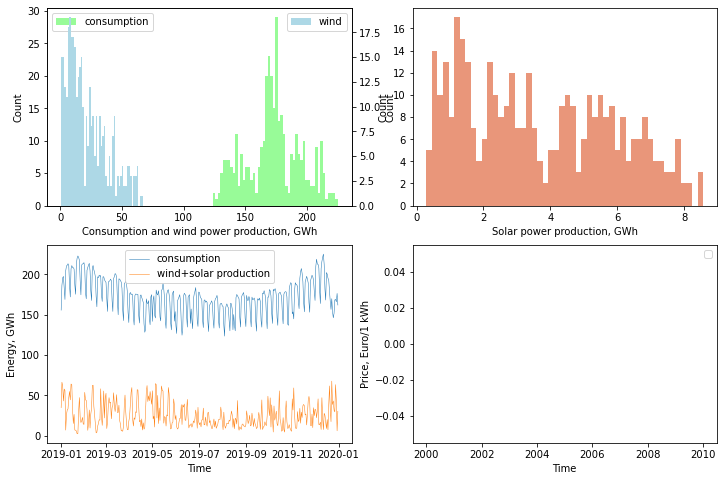

In [244]:
### General import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Read input file
df = pd.read_csv('opsd_austria_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Делаем срез данных для 2019 года
df1 = df[df.index.year == 2019]

# Task 1a: visualize distribution & time changes of input data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution of electricity consumption & wind production
ax[0,0].hist(df1['Electricity_consumption'], bins=50, color='palegreen', label='consumption') # put here electricity consumption values
ax[0,0].set_xlabel('Consumption and wind power production, GWh')
ax[0,0].set_ylabel('Count')

ax2 = ax[0,0].twinx() # insert the double y-axis using twinx to display wind power production

ax2.hist(df1['Wind_production'], bins=50, color='lightblue', label='wind') # put here wind power production values
ax2.set_ylabel('Count')
ax[0,0].legend(loc='best')
ax2.legend(loc='best')

# Distribution of solar power production
ax[0,1].hist(df1['Solar_production'], bins=50, color='darksalmon') # put here solar power production values
ax[0,1].set_xlabel('Solar power production, GWh')
ax[0,1].set_ylabel('Count')

# Time series
ax[1,0].plot(df1['Electricity_consumption'], linewidth = 0.5, label='consumption') # put here electricity consumption values
ax[1,0].plot(df1['Wind+Solar'], linewidth = 0.5, label='wind+solar production') # put here merged wind + solar data values
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Energy, GWh')
ax[1,0].legend(loc='best')

# Price distribution
ax[1,1].plot(df1['Price'], linewidth = 0.5) # substitute ... with spot price from the dataset
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Price, Euro/1 kWh')
ax[1,1].legend(loc='best')
plt.show()

Данных о цене за 2019 год нет.

In [245]:
df1.isna().sum()['Price'] == len(df1)

True

In [246]:
import warnings
warnings.filterwarnings('ignore')

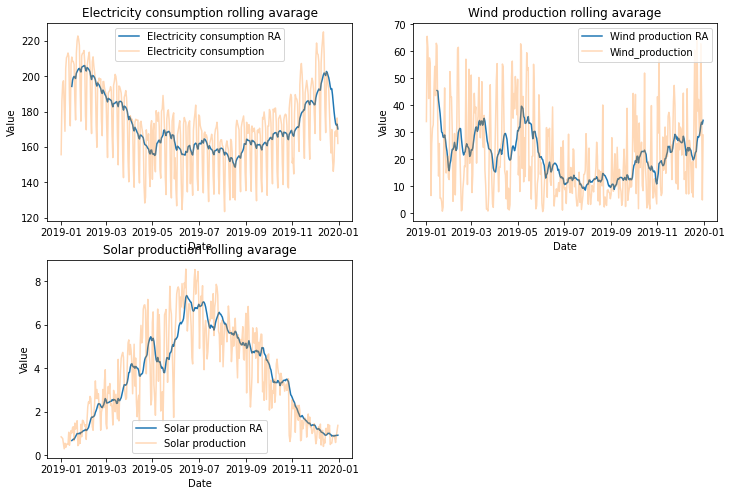

In [247]:
# Task 1b: analysing the seasonality for 2019 year
''' defining a rolling average '''
df1['Electricity_consumption_RA'] = df1['Electricity_consumption'].rolling(15).mean()
df1['Wind_production_RA'] = df1['Wind_production'].rolling(15).mean()
df1['Solar_production_RA'] = df1['Solar_production'].rolling(15).mean()

# Plot
plt.figure(figsize=(12,8))
plt.subplot(2,2, 1)
ax = plt.plot(df1['Electricity_consumption_RA'])
plt.plot(df1['Electricity_consumption'], alpha=0.3)
plt.legend(['Electricity consumption RA', 'Electricity consumption'])
plt.title('Electricity consumption rolling avarage')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(2,2,2)
ax = plt.plot(df1['Wind_production_RA'])
plt.plot(df1['Wind_production'], alpha=0.3)
plt.legend(['Wind production RA', 'Wind_production'])
plt.title('Wind production rolling avarage')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(2,2,3)
ax = plt.plot(df1['Solar_production_RA'])
plt.plot(df1['Solar_production'], alpha=0.3)
plt.legend(['Solar production RA', 'Solar production'])
plt.title('Solar production rolling avarage')
plt.xlabel('Date')
plt.ylabel('Value');

### Выводы:  
  
* Изменение производства ветровой энергии в течение 2019 года колеблется сильнее всего. Устойчиво, мньшие значения наблюдаются с июля по сентябрь, наибольшие же в весенние месяцы.    
* Изменение производства солнечной энергии в течение 2019 года возрастает с приближением к летним месяцам, с пиком июле (8 Г.в./час), когда дневное время максимально продолжительное.  В зимние месяцы находится практически на нуле.  
* Потребление электричества в течение 2019 года больше в зимние месяцы - самые высокие значения линии тренда приходятся на декабрь, январь и февраль. Однако даже в летние месяцы линия тренда возрастает (наверное, когда слишком жарко люди включают сплит-системы, или типа того).

## Задание 2. Использование Decision Tree + AdaBoost для прогнозирования временных рядов 
  
После успешного завершения анализа и визуализации данных тебе нужно
построить достоверный прогноз временных рядов с использованием
несложного, но эффективного алгоритма на основе Machine Learning.  
  
На почте ты обнаружил новое письмо от коллег из направления Analytics с
постановкой очередного задания.


<div class='alert alert-success'>
     
Добрый день!  
    
Поздравляем, ты хорошо справился с задачей по визуализации и анализу сезонности
исходных данных.  
    
Теперь нам нужно спрогнозировать с помощью ML-алгоритма динамику временного ряда
Electricity_consumption. Олег посоветовал начать с простых методов, например
ансамблевого обучения (ensemble learning). Для начала можно попробовать объединить
метод на основе деревьев принятия решений с алгоритмом AdaBoost.  
    
Наш Senior Data Scientist помог тебе с написанием кода по применению метода Decision
Tree + AdaBoost для прогнозирования значений потребления электричества в 2019 году
(McKinsey_task2_template.py, который доступен во вкладке «Полезные материалы»).  
    
Твоя задача состоит в том, чтобы <b>заполнить файл исходя из комментариев, оставленных
Олегом, в частности применить метод fillna для заполнения пропущенных значений. Ты
также должен исследовать влияние гиперпараметров max_depth (максимальная глубина
деревьев) и n_estimators (число деревьев) на точность модели</b>. Из предложенных значений
для двух параметров тебе нужно выбрать такие, при которых Root Mean Square Error (RMSE)
и Mean Absolute Error (MAE) минимальны. Помимо способа, предложенного в шаблоне, ты
можешь использовать GridSearch для подбора параметров модели.
Как обычно, ждем обновленный шаблон. Спасибо!
    

In [248]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE: 18.729532
MAE: 16.902106


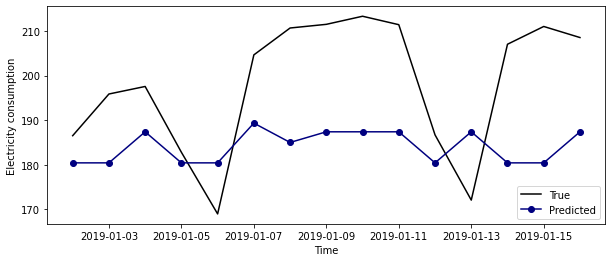

In [249]:
# read input
df = pd.read_csv('opsd_austria_daily.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# data imputation
def clean(dataset, columns):
    dataset[columns].replace(0, np.nan, inplace=True)
    dataset[columns].fillna(method='backfill', inplace=True) # choose a scheme for fillna
# call a clean function here for Electricity_consumption, Wind_production columns

clean(df, 'Electricity_consumption')
clean(df, 'Wind_production')

# data imputation
def clean(dataset, columns):
    dataset[columns].replace(0, np.nan, inplace=True)
    dataset[columns].fillna(method='backfill', inplace=True) # choose a scheme for fillna
# call a clean function here for Electricity_consumption, Wind_production columns

clean(df, 'Electricity_consumption')
clean(df, 'Wind_production')

# ensemble learning for regression
def ensemble_training(df_train, df_test):
    label = 'Electricity_consumption'
    X_train = df_train.drop(label, axis=1)
    y_train = df_train.loc[:,label]
    X_test = df_test.drop(label, axis=1)
    y_test = df_test.loc[:,label]
    dtrab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                              # check which value for max_depth gives better RMSE/MSE: 5, 10, 15, 20, 25
                              n_estimators=10,
                              # check which value for n_estimators gives better RMSE/MAE: 10, 20, 30, 40, 50, 100
                              random_state=1)
    dtrab.fit(X_train, y_train)
    y_predict=dtrab.predict(X_test)
    print('RMSE: %.6f' %(sqrt(mean_squared_error(y_test, y_predict))))
    print('MAE: %.6f' %(mean_absolute_error(y_test, y_predict)))
    df_sol=pd.DataFrame({'True': np.array(y_test),'Predicted': np.array(y_predict)})
    return dtrab, df_sol

features = ['Electricity_consumption','Wind_production','Month']
df_train = df.loc[df['Year']!=2019, features]
df_test = df.loc[df['Year']==2019, features]

def month_select(df, column):
    df_dummy = pd.get_dummies(df[column], prefix='M')
    df_new = pd.concat([df, df_dummy], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

df_train = month_select(df_train, 'Month')
df_test = month_select(df_test, 'Month')

df_sol = []
model, df_sol = ensemble_training(df_train, df_test)
df_sol = pd.concat([df_sol.reset_index(drop=True),
                  pd.Series(df.loc[df['Year']==2019,'Date']).reset_index(drop=True)], axis=1)

# visualization
fig,ax = plt.subplots(figsize=(10,4))
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'True'],
             marker='None',
             linestyle = '-',
             color='black', label='True')
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'Predicted'],
             marker='o',
             linestyle = '-',
             color='navy', markeredgecolor='navy', label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Electricity consumption')
ax.legend(loc='lower right')
plt.show()


Лучшие параметры:  
  
* max_depth=5  
* n_estimators=10  


### Использование GridSearchCV для подбора оптимальных гиперпараметров:

In [250]:
from sklearn.model_selection import GridSearchCV

estimator = AdaBoostRegressor()
param_grid = {'n_estimators': [5,10,15,20,25]}
cv=3

optimizer = GridSearchCV(estimator=estimator, param_grid=param_grid,cv=cv)
optimizer.fit(X_train, y_train)
optimizer.best_estimator_

AdaBoostRegressor(n_estimators=5)

In [251]:
estimator = DecisionTreeRegressor()
param_grid = {'max_depth': [5, 10,20,30,40,50,100]}
cv=3

optimizer = GridSearchCV(estimator=estimator, param_grid=param_grid,cv=cv)
optimizer.fit(X_train, y_train)
optimizer.best_estimator_

DecisionTreeRegressor(max_depth=5)

# Задание 3. Разработка бизнес-гипотез на основе анализа данных и оценка их экономического эффекта
  
   Твое погружение в исследование данных проходит очень успешно, впереди
осталось только финальное задание.
Тем временем на почте появилось новое письмо с инструкцией, что делать
дальше.

<div class='alert alert-success'>
    
Привет!
     
    
В качестве последнего задания в роли Data Scientist в McKinsey тебе предстоит выдвинуть
несколько бизнес-гипотез на основе проведенного анализа данных.
    
В частности, мы предлагаем тебе <b>вычислить разность между потреблением электричества и
производством энергии с помощью ветровых и солнечных установок</b> и добавить эту величину
в исходный файл <b>opsd_austria_daily.csv</b> последним столбцом Delta и загрузить решение,
переименовав файл в <b>opsd_austria_daily_updated.csv.</b>
    
Нахождение разницы между потреблением и производством энергии важно для расчета объема
ресурсов в энергетическом портфолио страны. Таким образом, ты <b>сможешь доказать или
опровергнуть гипотезу клиента</b> о том, что Австрии не хватит собственных ресурсов
ветряной и солнечной энергии для компенсации спроса на электроэнергию, которую страна
вынуждена будет покрывать за счет импорта природного газа. Напиши в файле кода
несколько строк комментариев по этому поводу.
    
Наконец, тебе необходимо определить примерную стоимость Delta, используя спотовую цену
и указать значения в столбце Price_delta, который также нужно добавить в файл
<b>opsd_austria_daily_updated.csv</b>. Это позволит компании оценить приблизительную прибыль в
случае, если Австрия будет закупать у них газ.


H0: Собственных ресурсов ветряной и солнечной энергии Австрии хватает, чтобы компенсировать спрос на электроэнергию страны.  
H1: Собственных ресурсов ветряной и солнечной энергии Австрии не хватает, чтобы компенсировать спрос на электроэнергию страны, и придётся прибегать за к импорту природного газа

In [261]:
df['delta'] = df['Electricity_consumption'] - df['Wind+Solar']

In [264]:
df.head()

,Date,Electricity_consumption,Wind_production,Solar_production,Price,Wind+Solar,Year,Month,delta
0,2015-01-01 00:00:00+00:00,151.030,3.930,0.000,1.001,NaN,2015,1,NaN
1,2015-01-02 00:00:00+00:00,138.923,17.151,0.279,0.739,17.430,2015,1,121.493
2,2015-01-03 00:00:00+00:00,130.691,15.712,0.321,0.468,16.033,2015,1,114.658
3,2015-01-04 00:00:00+00:00,125.123,37.943,0.224,0.330,38.167,2015,1,86.956
4,2015-01-05 00:00:00+00:00,162.381,35.963,0.276,0.931,36.239,2015,1,126.142


In [262]:
(df['delta']<0).sum()

0

Как видно, потребление энергии превышает её производство для всех полученных временных данных, что не позволяет нам принять нулевую гипотезу.

Как известно, в одном гигавате 1000000 килават. Нам нужно перевести стоимость из колонки price в стоимость на гигават энергии

In [266]:
df['Price'] = df['Price'].apply(lambda x: x*1000000)
df.head()

,Date,Electricity_consumption,Wind_production,Solar_production,Price,Wind+Solar,Year,Month,delta
0,2015-01-01 00:00:00+00:00,151.030,3.930,0.000,1001000.0,NaN,2015,1,NaN
1,2015-01-02 00:00:00+00:00,138.923,17.151,0.279,739000.0,17.430,2015,1,121.493
2,2015-01-03 00:00:00+00:00,130.691,15.712,0.321,468000.0,16.033,2015,1,114.658
3,2015-01-04 00:00:00+00:00,125.123,37.943,0.224,330000.0,38.167,2015,1,86.956
4,2015-01-05 00:00:00+00:00,162.381,35.963,0.276,931000.0,36.239,2015,1,126.142


In [267]:
df['Price_delta'] = df['Price'] * df['delta']
df.head()

,Date,Electricity_consumption,Wind_production,Solar_production,Price,Wind+Solar,Year,Month,delta,Price_delta
0,2015-01-01 00:00:00+00:00,151.030,3.930,0.000,1001000.0,NaN,2015,1,NaN,NaN
1,2015-01-02 00:00:00+00:00,138.923,17.151,0.279,739000.0,17.430,2015,1,121.493,89783327.0
2,2015-01-03 00:00:00+00:00,130.691,15.712,0.321,468000.0,16.033,2015,1,114.658,53659944.0
3,2015-01-04 00:00:00+00:00,125.123,37.943,0.224,330000.0,38.167,2015,1,86.956,28695480.0
4,2015-01-05 00:00:00+00:00,162.381,35.963,0.276,931000.0,36.239,2015,1,126.142,117438202.0


In [268]:
df.to_csv('opsd_austria_updated.csv')